In [1]:
import numpy as np 
import pandas as pd

In [2]:
stock_prices = pd.read_csv("stock_prices.csv")

stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])

stock_prices = stock_prices[['Date','SecuritiesCode','Open','High','Low','Close','Volume', 'Target']]
stock_prices

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026
...,...,...,...,...,...,...,...,...
2332526,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816
2332527,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478
2332528,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302
2332529,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098


In [3]:
stock_li=  pd.read_csv("stock_list.csv")
stock_li = stock_li[['SecuritiesCode', 'Name']]
stock_li

,SecuritiesCode,Name
0,1301,"KYOKUYO CO.,LTD."
1,1305,Daiwa ETF-TOPIX
2,1306,NEXT FUNDS TOPIX Exchange Traded Fund
3,1308,Nikko Exchange Traded Index Fund TOPIX
4,1309,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...
...,...,...
4412,9994,YAMAYA CORPORATION
4413,9995,"GLOSEL Co.,Ltd."
4414,9996,"Satoh&Co.,Ltd."
4415,9997,"BELLUNA CO.,LTD."


In [4]:
stocks = pd.merge(stock_prices, stock_li, on='SecuritiesCode')
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


<ipython-input-5-b2a446d023ae>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks.corr()


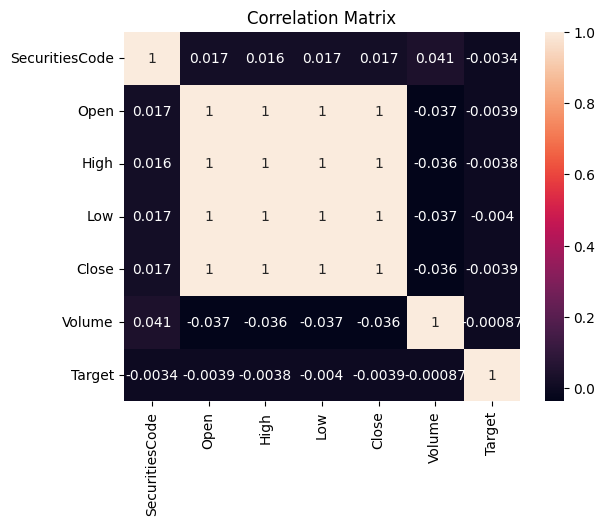

In [5]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = stocks.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [6]:
stocks.isna().sum()

Date                 0
SecuritiesCode       0
Open              7608
High              7608
Low               7608
Close             7608
Volume               0
Target             238
Name                 0
dtype: int64

In [7]:
# # stocks = stocks.fillna(stocks.mean(skipna=True))

# for col in stocks.columns:
#     stocks[col] = stocks[col].fillna(stocks[col].mean(skipna=True))

# # Show the resulting dataframe
# print(stocks)

In [8]:

stocks.dropna(inplace=True)


In [9]:

stock_prices.dropna(inplace=True)


In [10]:
stocks.isnull().sum()

Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
Target            0
Name              0
dtype: int64

In [11]:
stocks.duplicated().sum()

0

In [12]:
stocks.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,Target
count,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06
mean,5.895573e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.942008e+05,4.262053e-04
std,2.403239e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.917450e+06,2.339197e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,1.000000e+02,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.070000e+04,-1.052632e-02
50%,6.240000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.079000e+05,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.041000e+05,1.052632e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,6.182380e-01


In [13]:
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


In [18]:
Y=stocks['Close']
X=stocks[['High','Low','Open']]

In [19]:
X.isnull().sum()

High    0
Low     0
Open    0
dtype: int64

In [20]:
X

,High,Low,Open
0,2755.0,2730.0,2734.0
1,2747.0,2735.0,2743.0
2,2744.0,2720.0,2734.0
3,2754.0,2735.0,2745.0
4,2752.0,2737.0,2748.0
...,...,...,...
2332526,7350.0,6970.0,6970.0
2332527,7240.0,6410.0,6770.0
2332528,7380.0,6670.0,7190.0
2332529,7870.0,7110.0,7160.0


In [21]:
Y

0          2742.0
1          2738.0
2          2740.0
3          2748.0
4          2745.0
            ...  
2332526    6970.0
2332527    7020.0
2332528    7090.0
2332529    7520.0
2332530    7220.0
Name: Close, Length: 2324923, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler()
xScaled = Scale.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [24]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1627446, 3) (1627446,) (697477, 3) (697477,)


In [25]:
X_train 

,High,Low,Open
40866,857.0,835.0,836.0
2049545,1204.0,1193.0,1193.0
378573,7440.0,7280.0,7340.0
374497,3985.0,3920.0,3925.0
1942175,655.0,634.0,642.0
...,...,...,...
920231,1846.0,1803.0,1803.0
1386924,1376.0,1349.0,1369.0
786127,630.0,614.0,616.0
528211,2028.0,1935.0,1963.0


In [26]:
Y_train

40866       850.0
2049545    1200.0
378573     7350.0
374497     3945.0
1942175     646.0
            ...  
920231     1840.0
1386924    1352.0
786127      623.0
528211     2010.0
2190360    2023.0
Name: Close, Length: 1627446, dtype: float64

In [27]:
X_test

,High,Low,Open
1409083,1023.0,984.0,1007.0
2031577,533.0,523.0,533.0
1093529,1101.0,1093.0,1099.0
1964124,4890.0,4825.0,4855.0
880203,1220.0,1191.0,1220.0
...,...,...,...
1702172,16930.0,16470.0,16510.0
2204644,1070.0,1040.0,1043.0
215601,2884.0,2792.0,2830.0
906417,3330.0,3240.0,3240.0


In [28]:
Y_test

1409083      986.0
2031577      527.0
1093529     1101.0
1964124     4845.0
880203      1193.0
            ...   
1702172    16915.0
2204644     1070.0
215601      2874.0
906417      3285.0
1636377     3415.0
Name: Close, Length: 697477, dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression estimator
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 1179.4335609107377
R-squared: 0.9999088044566098


In [37]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from sklearn import metrics
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout,Flatten

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=model.fit(X_train,Y_train,epochs=5,batch_size=32)

Epoch 1/5
50858/50858 [==============================] - 695s 13ms/step - loss: 14935643.0000 - categorical_accuracy: 1.0000
Epoch 2/5
50858/50858 [==============================] - 690s 14ms/step - loss: 10449817.0000 - categorical_accuracy: 1.0000
Epoch 3/5
50858/50858 [==============================] - 708s 14ms/step - loss: 8950020.0000 - categorical_accuracy: 1.0000
Epoch 4/5
50858/50858 [==============================] - 694s 14ms/step - loss: 8661236.0000 - categorical_accuracy: 1.0000
Epoch 5/5
50858/50858 [==============================] - 710s 14ms/step - loss: 8172880.0000 - categorical_accuracy: 1.0000


In [38]:
train_predict2=model.predict(X_train)
test_predict2=model.predict(X_test)
train_predict2.shape, test_predict2.shape

21797/21797 [==============================] - 92s 4ms/step


((1627446, 1), (697477, 1))

In [39]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,test_predict2)))
print("Test data MSE: ", mean_squared_error(Y_test,test_predict2))
print("Test data MAE: ", mean_absolute_error(Y_test,test_predict2))

Test data RMSE:  2673.1030097958314
Test data MSE:  7145479.700979532
Test data MAE:  465.6878836648113


In [40]:
l_pred=model.predict(X_test)
l_pred=l_pred.flatten()

21797/21797 [==============================] - 89s 4ms/step


In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge regressor estimator
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = ridge.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 1179.2956062621577
R-squared: 0.9999088151234667


In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression estimator
regressor = LinearRegression()

# Create an AdaBoostRegressor object with LinearRegression as the base estimator
adaboost = AdaBoostRegressor(base_estimator=regressor)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean squared error: 1327.321834587299
R-squared: 0.9998973695170541
